# Data from other sources - WIP

### Neuromorpho 

Neuromorpho.org is a jsp website.  
Scrape and download using selenium. 

In [1]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup as BS
import neuroncollector
import time

In [5]:
scraper = neuroncollector.NeuroScraper(browser="Firefox",machine='ubuntu')

Connected to mongodb://localhost:27017/


In [6]:
scraper.driver.get('http://neuromorpho.org/byspecies.jsp')

In [7]:
scraper.driver.get_screenshot_as_file(filename='sc.png')

True

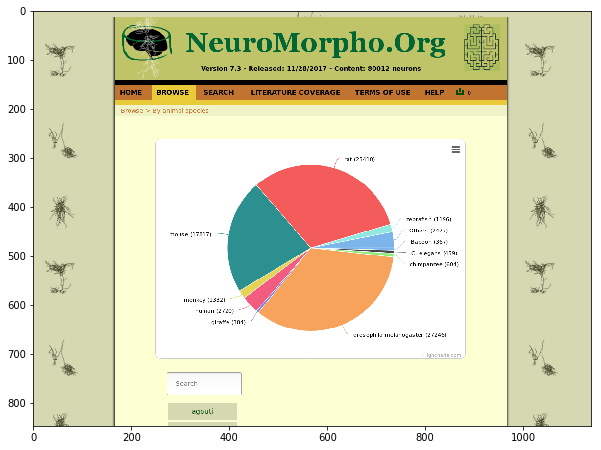

In [8]:
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [9]:
species = scraper.driver.find_elements_by_class_name('species')

In [10]:
# Total number of species in neuromorpho database:
len(species)

40

In [11]:
scraper.driver.find_element_by_link_text('human')

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="800688dc-bb3e-43b8-9b16-d217009b9bac", element="ae93d7ce-ac71-490c-b103-f9ea2c3c4100")>

In [12]:
# click on species:mouse 
scraper.driver.find_element_by_link_text('human').click()

In [10]:
#takes a while for data to load 
time.sleep(30)

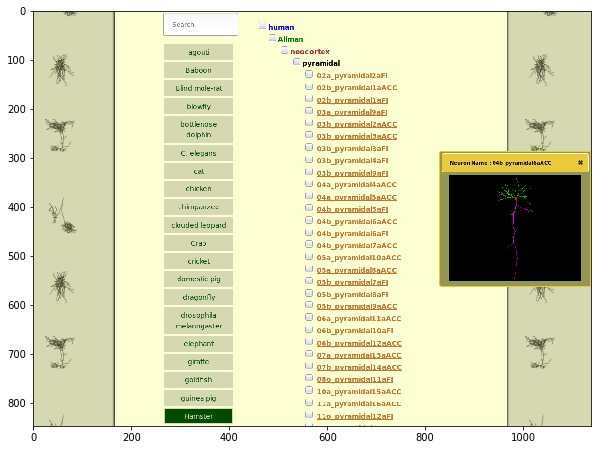

In [13]:
scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [14]:
# `lvl2` is class name for data source (i.e. the contributors)
lvl2 = scraper.driver.find_elements_by_class_name('lvl2')

In [15]:
len(lvl2)

15

In [16]:
# optionally get the entire page for parsing
page = scraper.driver.page_source

In [17]:
# soupify
soup = BS(page, "html.parser")

In [18]:
# get list of sources
datasources = soup.findAll("font", {"class": "lvl2"})

In [19]:
[a.text for a in datasources]

[u'Allman',
 u'Ataman_Boulting',
 u'DeFelipe',
 u'Jacobs',
 u'Kantor',
 u'Krasnoshchekova',
 u'Lasik',
 u'Lewis',
 u'Peng',
 u'Segev',
 u'Somogyi',
 u'Szegedi_Lamsa',
 u'Ullian',
 u'Vuksic',
 u'West']

In [20]:
# `lvl3` is label for brain regions
brain_region = soup.findAll("font", {"class": "lvl3"})

In [21]:
set([a.text for a in brain_region])

{u'cerebellum', u'neocortex', u'peripheral nervous system', u'retina'}

In [22]:
#Neuron cell types!  
cell_types = soup.findAll("font", {"class": "lvl4"})

In [23]:
set([a.text for a in cell_types])  

{u'Cajal-Retzius',
 u'Fast-spiking',
 u'GABAergic',
 u'Golgi',
 u'Lugaro',
 u'Non-fast spiking',
 u'amacrine',
 u'basket',
 u'bipolar',
 u'glutamatergic',
 u'granule',
 u'induced pluripotent stem cell-(iPSC)-derived',
 u'lung terminal',
 u'pyramidal',
 u'sensory receptor',
 u'stellate',
 u'von Economo neuron'}

In [24]:
# individual neuron ids
neurons = soup.findAll("a", {"class": "screenshot"})

In [25]:
# Number of neurons
len(neurons)

2720

In [26]:
# For each data source, click on checkbox and download
checkbox = soup.findAll("input", {"id": "human_chkbox"})

In [26]:
# scraper.driver.find_element_by_name('Sig').click()

In [29]:
scraper.driver.find_element_by_name('Aux').click()

In [30]:
scraper.driver.window_handles

[u'2147483649']

In [32]:
for idnum in range(len(datasources)):
    scraper.driver.switch_to.window(scraper.driver.window_handles[0])
    print("{} - Clicking on {}".format(idnum,datasources[idnum].text))
    if idnum > 0: 
        scraper.driver.find_elements_by_id('human_chkbox')[idnum-1].click()
    scraper.driver.find_elements_by_id('human_chkbox')[idnum].click()
    # Get selected files 
    scraper.driver.find_element_by_xpath("//input[@value='Get SWC files of selected neurons']").click()
    time.sleep(5)
    scraper.driver.switch_to.window(scraper.driver.window_handles[1])
    time.sleep(10)
    scraper.driver.find_element_by_name('yes').click()
    time.sleep(20)
    scraper.driver.close()

0 - Clicking on Allman
1 - Clicking on Ataman_Boulting
2 - Clicking on DeFelipe
3 - Clicking on Jacobs
4 - Clicking on Kantor
5 - Clicking on Krasnoshchekova
6 - Clicking on Lasik
7 - Clicking on Lewis
8 - Clicking on Peng
9 - Clicking on Segev
10 - Clicking on Somogyi
11 - Clicking on Szegedi_Lamsa
12 - Clicking on Ullian
13 - Clicking on Vuksic
14 - Clicking on West


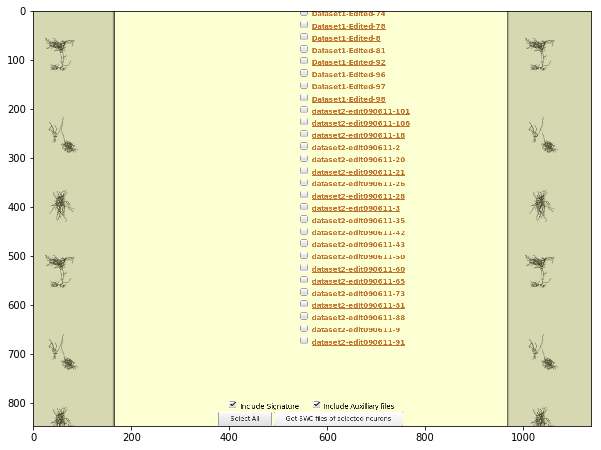

In [41]:
scraper.driver.switch_to.window(scraper.driver.window_handles[0])

scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [45]:
ls

analyze_swcfile.py                  phantomjs-2.1.1-linux-x86_64/
Basic data storage and EDA.ipynb    phantomjs-2.1.1-linux-x86_64.tar.bz2
database.py                         __pycache__/
Data from other sources.ipynb       README.md
geckodriver.log                     sc.png
geckodriver-v0.11.1-linux64.tar.gz  screenshot.png
ghostdriver.log                     swc.py
neuroncollector.py                  tmp/
neuroncollector.pyc                 Untitled1.ipynb
notes.md


In [ ]:
# Todo: tidy up and create functions based on notebook